In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

df = pd.read_csv(r'C:\Users\Kerry\steps_tracker_dataset.csv')
print(df.shape)
df.head()

(500, 8)


,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,08/10/2022,4147,3.11,124.41,41,10.5,3.77,stressed
1,11/06/2022,323,0.24,9.69,3,6.0,1.90,sad
2,28/01/2022,6622,4.97,198.66,66,6.0,4.48,sad
3,23/03/2022,11136,8.35,334.08,111,8.0,1.08,tired
4,20/05/2022,2718,2.04,81.54,27,4.9,1.00,tired


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 500 non-null    object 
 1   steps                500 non-null    int64  
 2   distance_km          500 non-null    float64
 3   calories_burned      500 non-null    float64
 4   active_minutes       500 non-null    int64  
 5   sleep_hours          500 non-null    float64
 6   water_intake_liters  500 non-null    float64
 7   mood                 500 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [3]:
df.columns

Index(['date', 'steps', 'distance_km', 'calories_burned', 'active_minutes',
       'sleep_hours', 'water_intake_liters', 'mood'],
      dtype='object')

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

date                   0
steps                  0
distance_km            0
calories_burned        0
active_minutes         0
sleep_hours            0
water_intake_liters    0
mood                   0
dtype: int64

In [6]:
df.describe()

,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,10238.572000,7.678800,307.157160,102.40800,7.292400,2.506580
std,5829.268207,4.371964,174.878046,58.29293,1.814046,1.426296
min,26.000000,0.020000,0.780000,0.00000,3.100000,0.040000
25%,5313.250000,3.985000,159.397500,53.00000,6.000000,1.300000
50%,10699.000000,8.025000,320.970000,107.00000,7.000000,2.495000
75%,15317.500000,11.490000,459.525000,153.00000,8.225000,3.785000
max,19979.000000,14.980000,599.370000,200.00000,12.000000,5.000000


### Linear Regression

In [7]:
X = df.iloc[:,[2,4]].values
y = df.iloc[:,2].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
r2_score = regressor.score(X_test, y_test)
print(f"Mean squeared error: {mse}")
print(f"Rsquared score: {r2_score}")

Mean squeared error: 2.4157651886528524e-30
Rsquared score: 1.0


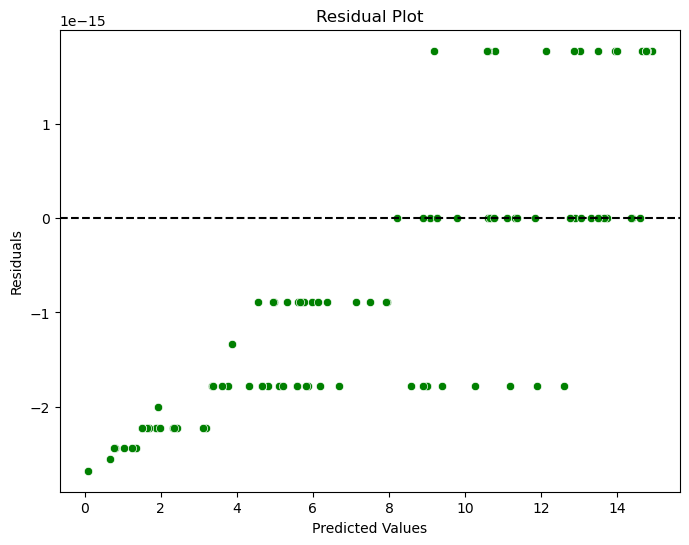

In [11]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color="green")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Convert mood into numerical values

In [12]:
from sklearn.preprocessing import LabelEncoder


In [15]:
label_encoder = LabelEncoder()
df["mood"] = label_encoder.fit_transform(df["mood"])

mood_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mood Mapping:", mood_mapping)
print(df.head())

Mood Mapping: {'energetic': 0, 'happy': 1, 'sad': 2, 'stressed': 3, 'tired': 4}
         date  steps  distance_km  calories_burned  active_minutes  \
0  08/10/2022   4147         3.11           124.41              41   
1  11/06/2022    323         0.24             9.69               3   
2  28/01/2022   6622         4.97           198.66              66   
3  23/03/2022  11136         8.35           334.08             111   
4  20/05/2022   2718         2.04            81.54              27   

   sleep_hours  water_intake_liters  mood  
0         10.5                 3.77     3  
1          6.0                 1.90     2  
2          6.0                 4.48     2  
3          8.0                 1.08     4  
4          4.9                 1.00     4  


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import sklearn.metrics

In [23]:
X = df.drop(columns=["date"])
y = df["mood"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

   energetic       1.00      1.00      1.00        18
       happy       1.00      1.00      1.00        23
         sad       1.00      1.00      1.00        19
    stressed       1.00      1.00      1.00        22
       tired       1.00      1.00      1.00        18

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



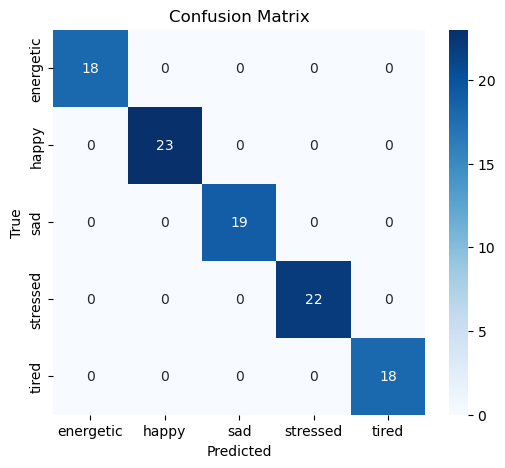

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()